# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Kaysa Azzahra A
- **Email:** kaysaazzhra@gmail.com
- **ID Dicoding:** kaysaazzhra

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara kondisi cuaca (musim) dengan jumlah peminjaman sepeda?
- Bagaimana pola peminjaman sepeda di tiap jam antara weekday dan weekend?
- Bagaimana distribusi harian peminjaman sepeda untuk pengguna yang terdaftar dan tidak?

## Import Semua Packages/Library yang Digunakan


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

hour.csv

In [2]:
# import dataset
hour_df = pd.read_csv("hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


day.csv

In [3]:
day_df = pd.read_csv("day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

hour.csv

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# mengecek nilai kosong
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- tidak ada nilai kosong

In [6]:
# mengecek duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


- tidak ada duplikasi data

In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


day.csv

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
# mengecek nilai kosong
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- tidak ada nilai kosong

In [10]:
# mengecek duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


- tidak ada duplikasi

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

hour.csv

In [12]:
# mengubah tipe data kolom date
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- date yang sebelumnya merupakan tipe object, berubah menjadi tipe datetime


In [14]:
# rename kolom
hour_df = hour_df.rename(columns={'weathersit':'weather',
                             'dteday':'date',
                             'yr':'year',
                             'mnth':'month',
                             'hr':'hour',
                             'hum':'humidity',
                             'cnt':'count'})

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- kolom-kolom yang sebelumnya ditulis dengan singkatan, sekarang menjadi lebih mudah dibaca

day.csv

In [15]:
# mengubah tipe data kolom date
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [16]:
# rename kolom
day_df = day_df.rename(columns={'weathersit':'weather',
                             'dteday':'date',
                             'yr':'year',
                             'mnth':'month',
                             'hr':'hour',
                             'hum':'humidity',
                             'cnt':'count'})

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- kolom-kolom yang sebelumnya ditulis dengan singkatan, sekarang menjadi lebih mudah dibaca

## Exploratory Data Analysis (EDA)

### Explore ...

hour.csv

In [17]:
# mencari nilai unik
hour_df.apply(lambda x: len(x.unique()))

instant       17379
date            731
season            4
year              2
month            12
hour             24
holiday           2
weekday           7
workingday        2
weather           4
temp             50
atemp            65
humidity         89
windspeed        30
casual          322
registered      776
count           869
dtype: int64

In [18]:
# mengganti angka yang mewakili musim dengan label musim
season_rename = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season'] = hour_df['season'].map(season_rename)

In [19]:
# menampilkan label yang baru diganti
display(hour_df[['season', 'count', 'hour']])

,season,count,hour
0,Spring,16,0
1,Spring,40,1
2,Spring,32,2
3,Spring,13,3
4,Spring,1,4
...,...,...,...
17374,Spring,119,19
17375,Spring,89,20
17376,Spring,90,21
17377,Spring,61,22


In [20]:
# mengelompokkan dan menghitung jumlah peminjaman sepeda per musimnya
hour_df.groupby('season')['count'].sum().sort_values(ascending=False).head()

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: count, dtype: int64

- rata-rata peminjaman diurutkan berdasarkan musim dengan peminjaman terbanyak

In [21]:
# mengubah kolom 'workingday' dan 'weekday' menjadi kategori

list_kolom = ['workingday', 'weekday']

for kolom in list_kolom:
  hour_df[kolom] = hour_df[kolom].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [22]:
# melihat peminjaman sepeda di tiap jamnya berdasarkan weekday dan weekend
hari_dan_jam = hour_df.groupby(['hour', 'weekday'])['count'].sum().reset_index()
print(hari_dan_jam)

     hour weekday  count
0       0       0   9775
1       0       1   3571
2       0       2   2790
3       0       3   3594
4       0       4   4045
..    ...     ...    ...
163    23       2   7922
164    23       3   8625
165    23       4  10062
166    23       5  11982
167    23       6  12049

[168 rows x 3 columns]


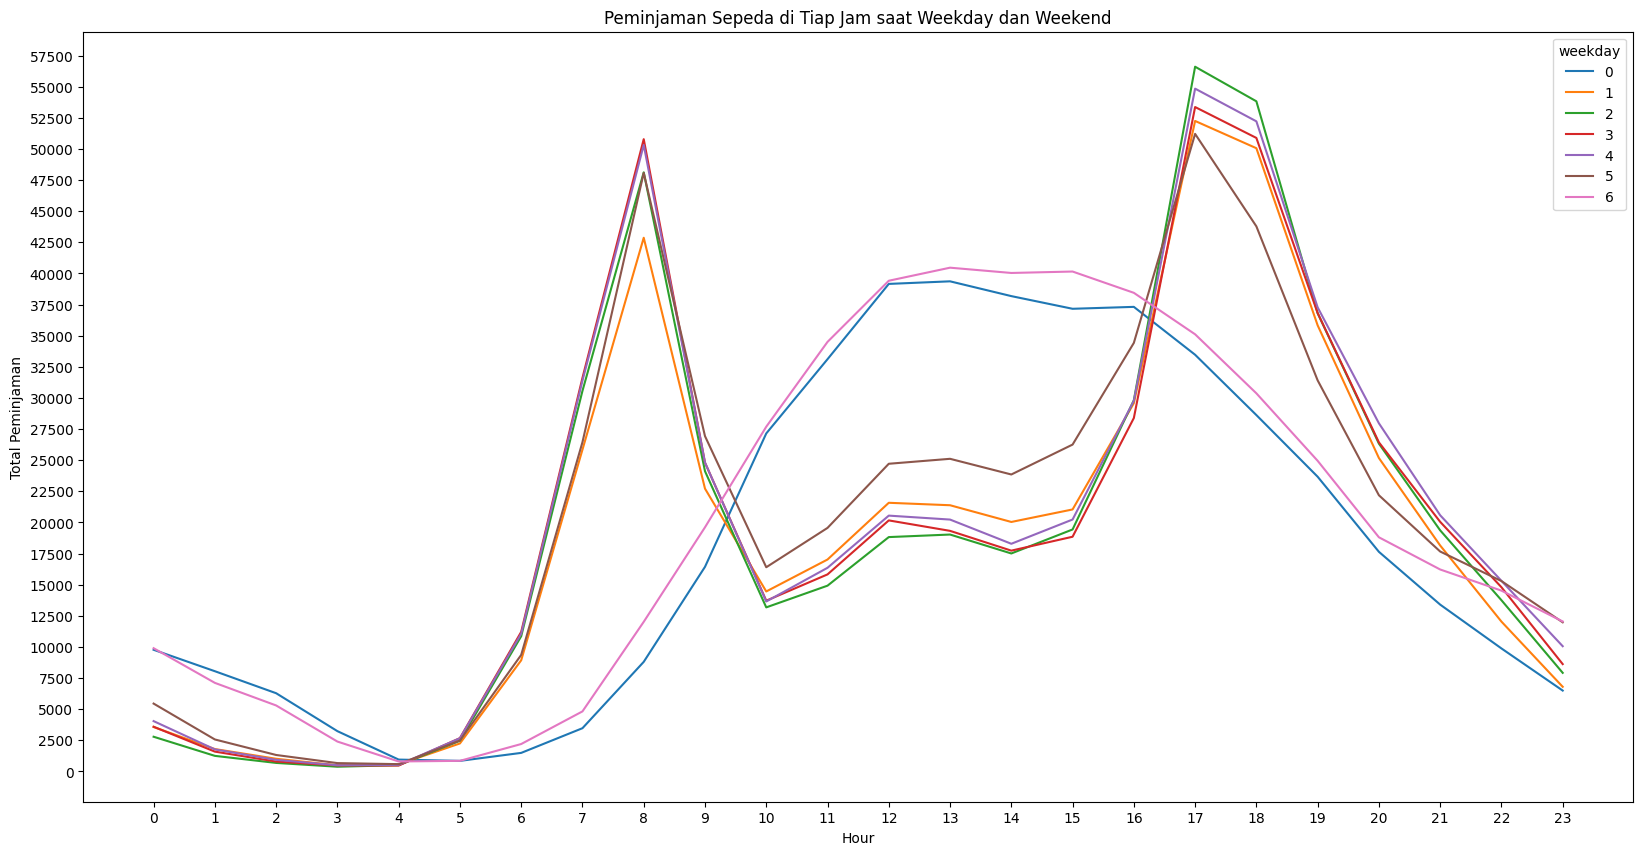

In [23]:
# sebelum di kelompokkan menjadi 'weekday' dan 'weekend'
plt.figure(figsize=(20, 10))
sns.lineplot(data=hari_dan_jam, x='hour', y='count', hue='weekday')
plt.title('Peminjaman Sepeda di Tiap Jam saat Weekday dan Weekend')

plt.xlabel('Hour')
plt.xticks(range(24), labels=[str(i) for i in range(24)])

plt.ylabel('Total Peminjaman')
plt.yticks(range(0, 60000, 2500))

plt.show()

- Merupakan grafik yang menunjukkan peminjaman sepeda di tiap jamnya pada saat weekend dan weekday
- Grafik ini merupakan grafik sebelum dikelompokkannya hari (0 dan 6) menjadi weekend dan (1, 2, 3, 4 dan 5) menjadi weekday

In [24]:
# mengelompokan hari menjadi weekday (1, 2, 3, 4, 5) dan weekend (0 dan 6)
hour_df['weekday'] = hour_df['weekday'].map({0: 'Weekend', 6: 'Weekend', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday', 5: 'Weekday'})

day.csv

In [25]:
# mengelompokkan data berdasarkan tanggal dan menghitung total peminjaman perhari
pengguna_per_hari = day_df.groupby('date').sum().reset_index()
print(pengguna_per_hari)

          date  instant  season  year  month  holiday  weekday  workingday  \
0   2011-01-01        1       1     0      1        0        6           0   
1   2011-01-02        2       1     0      1        0        0           0   
2   2011-01-03        3       1     0      1        0        1           1   
3   2011-01-04        4       1     0      1        0        2           1   
4   2011-01-05        5       1     0      1        0        3           1   
..         ...      ...     ...   ...    ...      ...      ...         ...   
726 2012-12-27      727       1     1     12        0        4           1   
727 2012-12-28      728       1     1     12        0        5           1   
728 2012-12-29      729       1     1     12        0        6           0   
729 2012-12-30      730       1     1     12        0        0           0   
730 2012-12-31      731       1     1     12        0        1           1   

     weather      temp     atemp  humidity  windspeed  casual  

In [26]:
# menghitung rata-rata per hari
rata_rata_harian = pengguna_per_hari[['registered', 'casual']].mean()
print(rata_rata_harian)

registered    3656.172367
casual         848.176471
dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara kondisi cuaca (musim) dengan jumlah peminjaman sepeda?

In [27]:
# assign korelasi untuk digunakan sebagai sumbu y
jumlah_per_musim = hour_df.groupby('season')['count'].sum()

In [28]:
# urutkan berdasarkan jumlah tertinggi
jumlah_per_musim_sorted = jumlah_per_musim.sort_values(ascending=False)

<ipython-input-29-cb99a7048f18>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jumlah_per_musim.index, y=jumlah_per_musim.values,


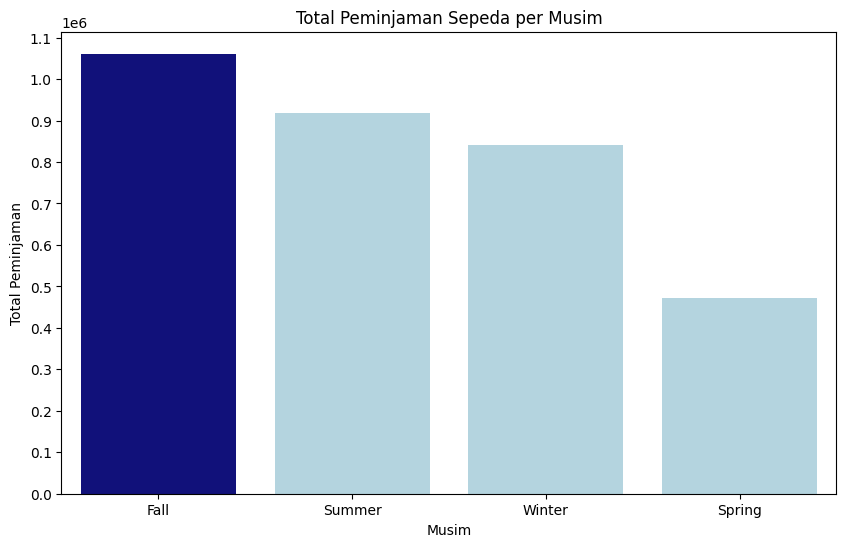

In [29]:
# visualisasi data dengan barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=jumlah_per_musim.index, y=jumlah_per_musim.values,
            palette={'Spring':'lightblue', 'Summer':'lightblue', 'Fall':'darkblue', 'Winter':'lightblue'},
            order=jumlah_per_musim_sorted.index)
plt.title('Total Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman')
plt.yticks(range(0, 1200000, 100000))
plt.show()

- Grafik ini menunjukkan bagaimana hubungan total peminjaman sepeda berdasarkan musim

### Pertanyaan 2: Bagaimana pola peminjaman sepeda di tiap jam antara weekday dan weekend?

In [30]:
# akan digunakan sebagai data
hari_dan_jam = hour_df.groupby(['hour', 'weekday'])['count'].sum().reset_index()

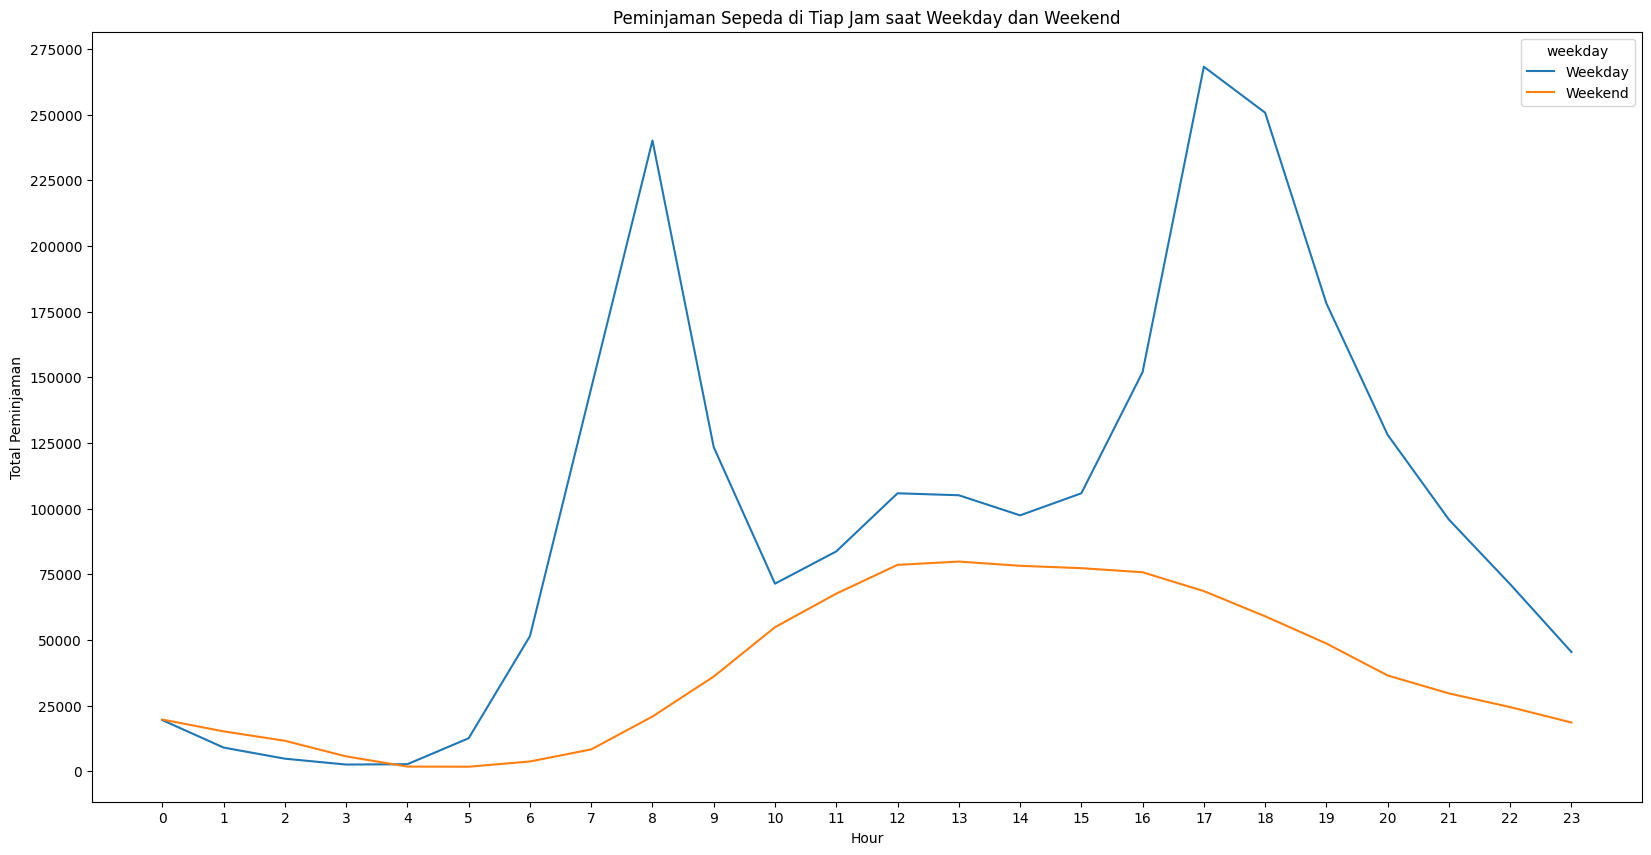

In [31]:
# visualisasi data dengan lineplot

plt.figure(figsize=(20, 10))
sns.lineplot(data=hari_dan_jam, x='hour', y='count', hue='weekday')
plt.title('Peminjaman Sepeda di Tiap Jam saat Weekday dan Weekend')

plt.xlabel('Hour')
plt.xticks(range(24), labels=[str(i) for i in range(24)])

plt.ylabel('Total Peminjaman')
plt.yticks(range(0, 300000, 25000))

plt.show()

- Grafik ini merupakan grafik dari peminjaman sepeda di tiap jam saat weekday dan weekend setelah dibagi menjadi kategori 'weekend' dan 'weekday' secara keseluruhan

### Pertanyaan 3: Bagaimana distribusi harian peminjaman sepeda untuk pengguna yang terdaftar dan tidak?

In [32]:
# digunakan sebagai data
rata_rata_harian = pengguna_per_hari[['registered', 'casual']].mean()

<ipython-input-33-6b9ac4b2f5f9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rata_rata_harian.index, y=rata_rata_harian.values,


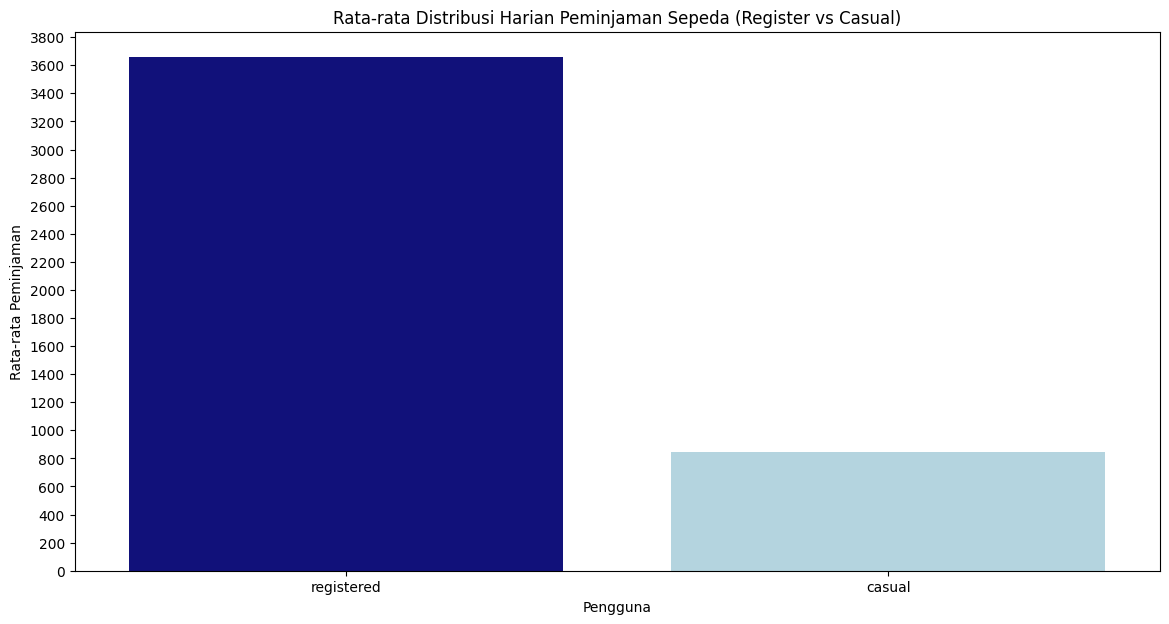

In [33]:
# visualisasi data dengan barplot

plt.figure(figsize=(14, 7))
sns.barplot(x=rata_rata_harian.index, y=rata_rata_harian.values,
            palette={'registered':'darkblue', 'casual':'lightblue'})
plt.title('Rata-rata Distribusi Harian Peminjaman Sepeda (Register vs Casual)')

plt.xlabel('Pengguna')

plt.ylabel('Rata-rata Peminjaman')
plt.yticks(range(0, 4000, 200))

plt.show()

- Grafik ini menunjukkan rata-rata pengguna harian berdasarkan pengguna yang sudah terdatar atau pengguna casual

## Conclusion

- Berdasarkan data hour.csv dan visualisasi data yang ada diatas, dapat dilihat bahwa musim cukup berpengaruh dengan jumlah peminjaman sepeda. Peminjaman terbanyak berada di musim gugur dengan urutan pertama, diikuti dengan musim panas diurutan kedua, lalu musim dingin diurutan ketiga dan diikuti oleh musim semi di urutan keempat. Terdapat perbedaan jumlah yang cukup jauh di peminjaman sepeda pada musim gugur dan semi. Sehingga dapat disimpulkan bahwa pengguna lebih memilih untuk meminjam sepeda di musim gugur dibandingkan dengan di musim semi.
- Berdasarkan data, perbedaan yang cukup signifikan dapat kita lihat pada grafik. Peminjaman sepeda memiliki peminat jauh lebih tinggi di weekday dibandingkan dengan weekend. Puncak tertinggi saat weekend hanya berada di range 50000-75000 pada jam 13. Sementara puncak tertinggi saat weekday menyentuh range 250000-275000 pada jam 17. Selain itu puncak tertinggi kedua saat weekday ada di jam 8 dengan range peminjaman 225000-250000. Hal ini mungkin disebabkan pada saat weekend pengguna cenderung lebih bersantai dan aktif di siang hari. Sementara pada saat weekday penggunaan di jam 8 dan 17 yang merupakan dua titik tertinggi dapat disebabkan karena aktivitas sehari-hari yaitu bekerja. Pada saat weekend peminjaman sepeda juga tidak terlalu variatif, bisa dilihat dari grafik garis yang cukup melandai. Sebaliknya pada saat weekday peminjaman di tiap jamnya cukup bervariasi, sehingga menghasilkan grafik garis yang memiliki cukup perubahan.
- Perbedaan signifikan dapat dilihat dari rata-rata distribusi harian peminjaman sepeda. Mayoritas peminjam ialah mereka yang sudah menjadi pengguna terdaftar dengan rata-rata harian berada di angka 3600. Sedangkan untuk pengguna casual sendiri memiliki rata-rata pengguna sebanyak kurang lebih 800. Dapat disimpulkan bahwa pengguna harian mayoritas adalah pengguna yang sudah terdaftar.